In [20]:
import glob
import random

import cv2 
import pytesseract
from matplotlib import pyplot as plt
import numpy as np

## Read Image

In [44]:
img = cv2.imread(random.choice(glob.glob('data/*.jpg')), cv2.IMREAD_GRAYSCALE)

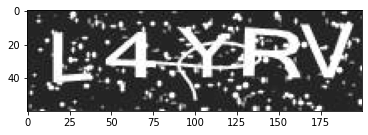

In [45]:
_ = plt.imshow(img, cmap='gray')

## Opening

In [46]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
img_opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel, iterations=1)

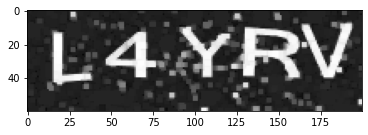

In [47]:
_ = plt.imshow(img_opening, cmap='gray')

## Blur

In [48]:
img_blur = cv2.medianBlur(img_opening, 5)
# img_blur = cv2.GaussianBlur(img_opening, (5, 5), 0)
# img_blur = img_opening

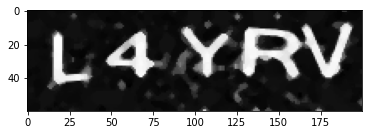

In [49]:
_ = plt.imshow(img_blur, cmap='gray')

## Binarize

In [50]:
thresh = 180
rect, img_thresh = cv2.threshold(img_blur, thresh, 255, cv2.THRESH_BINARY)

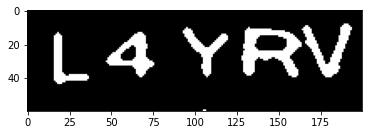

In [51]:
_ = plt.imshow(img_thresh, cmap='gray')

## Connected Component

In [52]:
num_components, components, stats, _ = cv2.connectedComponentsWithStats(img_thresh, None, None, None, 8, cv2.CV_32S)
sizes = stats[:, -1]
img_connected = np.zeros((components.shape), np.uint8)
for i in range(1, num_components):
    if sizes[i] >= 64:
        img_connected[components == i] = 255

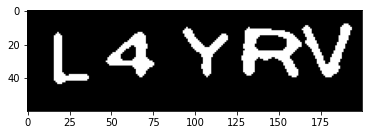

In [53]:
_ = plt.imshow(img_connected, cmap='gray')

## Erode or Dilate

In [54]:
kernel = np.ones((2, 2), np.uint8)
img_erosion = cv2.dilate(img_connected, kernel, iterations = 1)

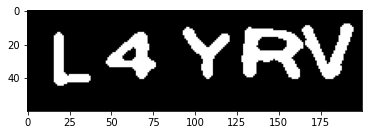

In [55]:
_ = plt.imshow(img_erosion, cmap='gray')

In [56]:
custom_config = r'--oem 0 --psm 7'
ans = pytesseract.image_to_string(img_erosion, config=custom_config)
ans = ans.replace(' ', '').split('\n')[0].upper()
ans

'L4YRV'

## Combine All

In [15]:
def preprocess(image_gray):
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    image_opening = cv2.morphologyEx(image_gray, cv2.MORPH_OPEN, kernel, iterations=1)
    image_blur = cv2.GaussianBlur(image_opening, (5, 5), 0)
    _, image_thresh = cv2.threshold(image_blur, 190, 255, cv2.THRESH_BINARY)

    num_components, components, stats, _ = cv2.connectedComponentsWithStats(image_thresh,
                                                                            None, None, None, 8, cv2.CV_32S)
    sizes = stats[:, -1]
    image_connected = np.zeros(components.shape, np.uint8)
    for i in range(1, num_components):
        if sizes[i] >= 64:
            image_connected[components == i] = 255

    kernel = np.ones((2, 2), np.uint8)
    image_dilation = cv2.dilate(image_connected, kernel, iterations=1)
#     _, image_dilation = cv2.threshold(image_dilation, 180, 255, cv2.THRESH_BINARY_INV)
    return image_dilation


def image_to_string(image):
    custom_config = r'--oem 2 --psm 7'
    s = pytesseract.image_to_string(image, config=custom_config)
    punctuations = " !()-[]{};:\'\"\\,<>./?@#$%^&*_~‘"
    for punctuation in punctuations:
        s = s.replace(punctuation, '')
    s = s.split('\n')[0].upper()
    return s

In [17]:
from main import image_to_string as its
from main import preprocess as pp

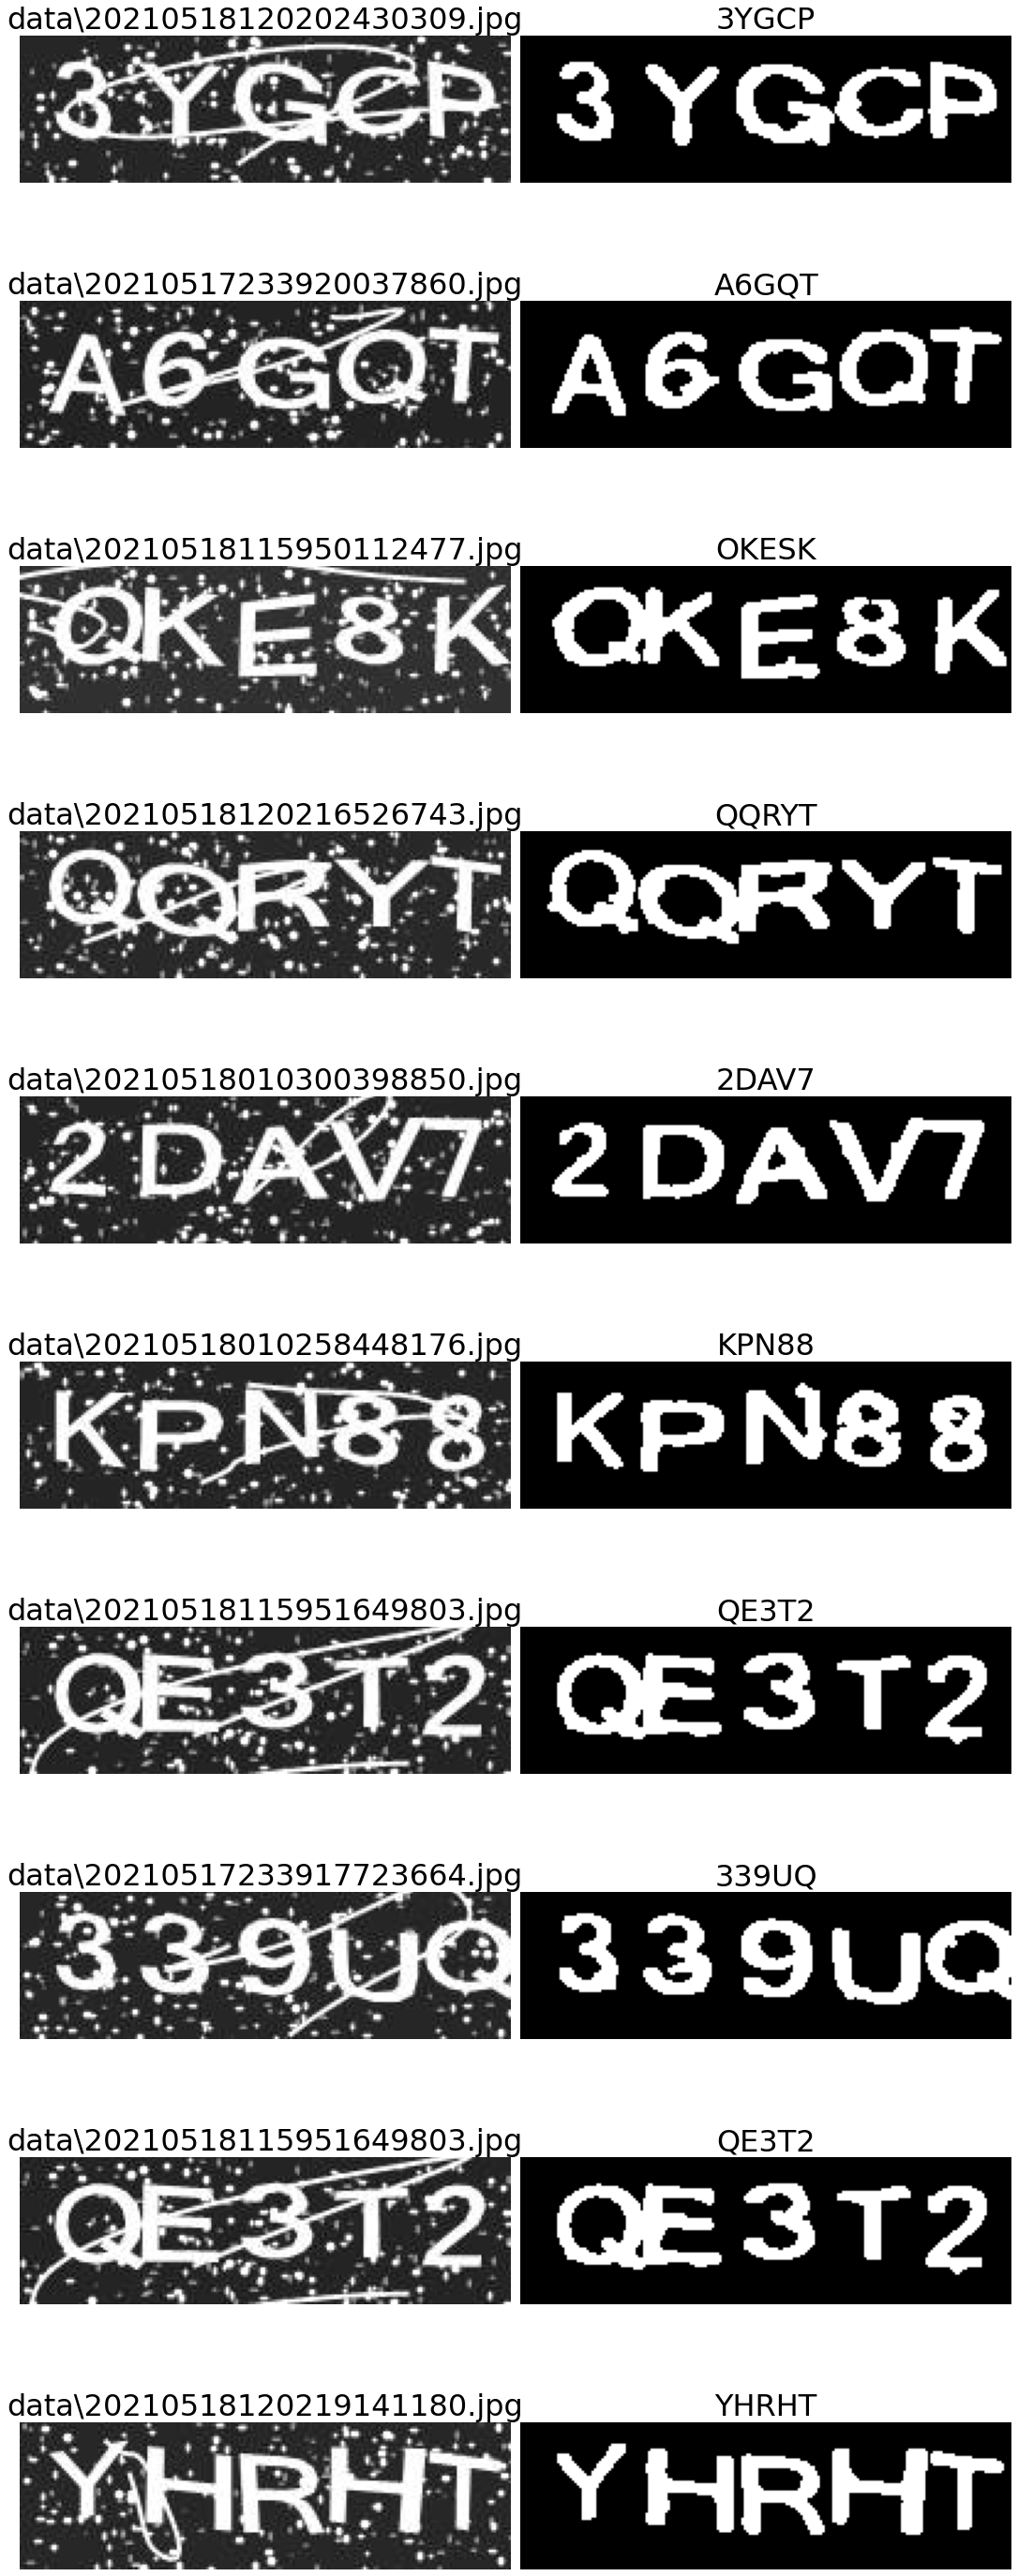

In [19]:
plt.figure(figsize=(15, 40))
image_path = random.choices(glob.glob('data/*.jpg'), k=10)
for i in range(10):
    input_image = cv2.imread(image_path[i], cv2.IMREAD_GRAYSCALE)
    image = pp(input_image)
    ans = its(image)

    plt.subplot(10, 2, i + (i+1))
    plt.title(image_path[i], fontsize=32)
    _ = plt.imshow(input_image, cmap='gray')
    plt.axis('off')
    
    plt.subplot(10, 2, i + (i+2))
    plt.title(ans, fontsize=32)
    _ = plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()
plt.show()